In [31]:
# IMPORT MODULES

import sklearn
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [32]:
# LOAD DATA

data_file ='features.csv'

data_dir = r'..\data'

df_inputs_train = pd.read_csv(os.path.join(data_dir, 'inputs_train.csv'), index_col=0)
df_outputs_train = pd.read_csv(os.path.join(data_dir, 'outputs_train.csv'), index_col=None)
df_inputs_test = pd.read_csv(os.path.join(data_dir, 'inputs_test.csv'), index_col=0)
df_outputs_test = pd.read_csv(os.path.join(data_dir, 'outputs_test.csv'), index_col=None)

print(df_inputs_train.info())
print(df_outputs_train.info())

targets = df_outputs_train.columns
predictors = df_outputs_train.columns

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 1 to 171
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   H_MaxP                    171 non-null    float64
 1   A_MaxP                    171 non-null    float64
 2   H_Max                     171 non-null    float64
 3   A_Max                     171 non-null    float64
 4   AUO_Left_H_70             171 non-null    float64
 5   AUO_Right_H_50            171 non-null    float64
 6   AUO_Right_H_60            171 non-null    float64
 7   AUO_Right_H_70            171 non-null    float64
 8   AUO_Left_A_70             171 non-null    float64
 9   AUO_Right_A_50            171 non-null    float64
 10  AUO_Right_A_60            171 non-null    float64
 11  AUO_Right_A_70            171 non-null    float64
 12  W_Left_H_70               171 non-null    float64
 13  W_Right_H_50              171 non-null    float64
 14  W_Right_H_60   

In [33]:
# NORMALIZE THE DATA

scaler_predictors = MinMaxScaler()
scaler_targets = MinMaxScaler()

scaler_predictors.fit(df_inputs_train)
scaler_targets.fit(df_outputs_train)


x_train = scaler_predictors.transform(df_inputs_train)
x_test = scaler_predictors.transform(df_inputs_test)

y_train = scaler_targets.transform(df_outputs_train)
y_test = scaler_targets.transform(df_outputs_test)


def print_info(X):
    print(X.shape, np.min(X), np.max(X))

print_info(x_train)
print_info(x_test)
print_info(y_train)
print_info(y_test)


(171, 25) 0.0 1.0000000000000002
(37, 25) -0.12082623999552955 1.396038956503235
(171, 3) 0.0 1.0000000000000002
(37, 3) 0.017045454545454808 1.1812080536912748


In [34]:

def calculate_error(yp, ya):

    error = yp - ya
    std_error = np.std(error, axis = 0)
    bias_error = np.mean(error, axis = 0)

    return error, std_error, bias_error



def plot_everything(y_train, y_test, y_predict_train, y_predict_test):

    # undo normalization

    y_predict_train_unnormalized = scaler_targets.inverse_transform(y_predict_train)
    y_predict_test_unnormalized = scaler_targets.inverse_transform(y_predict_test)

    y_actual_train_unnormalized = scaler_targets.inverse_transform(y_train)
    y_actual_test_unnormalized = scaler_targets.inverse_transform(y_test)

    N_targets = len(targets)

    fig, ax = plt.subplots(2, N_targets)
    fig.set_size_inches(10, 7)

    error_train, std_error_train, bias_error_train = calculate_error(y_predict_train_unnormalized, y_actual_train_unnormalized)
    error_test, std_error_test, bias_error_test = calculate_error(y_predict_test_unnormalized, y_actual_test_unnormalized)

    for i in range(N_targets):

        ax[0,i].scatter(y_actual_train_unnormalized[:, i], y_predict_train_unnormalized[:, i], label = 'train')
        ax[0,i].scatter(y_actual_test_unnormalized[:, i], y_predict_test_unnormalized[:, i], label = 'test')
        ax[0,i].set_xlabel('actual')
        ax[0,i].set_ylabel('predicted')
        ax[0,i].set_title(targets[i])
        ax[0,i].legend()

        ymin = np.min([*y_actual_train_unnormalized[:, i], *y_predict_train_unnormalized[:, i]])
        ymax = np.max([*y_actual_train_unnormalized[:, i], *y_predict_train_unnormalized[:, i]])
        ax[0,i].plot([ymin, ymax], [ymin, ymax], color = 'k', linestyle = '--')


        ax[1,i].hist(error_train[:, i], label = f'train, std = {std_error_train[i]:.1f}, bias = {bias_error_train[i]:.1f}', density = True, alpha = 1)
        ax[1,i].hist(error_test[:, i], label = f'test, std = {std_error_test[i]:.1f}, bias = {bias_error_test[i]:.1f} ', density = True, alpha = .6)
        ax[1,i].set_xlabel('error (mmHg)')
        ax[1,i].set_title(f'error historgram: {targets[i]}')
        ax[1,i].legend()

    fig.tight_layout()





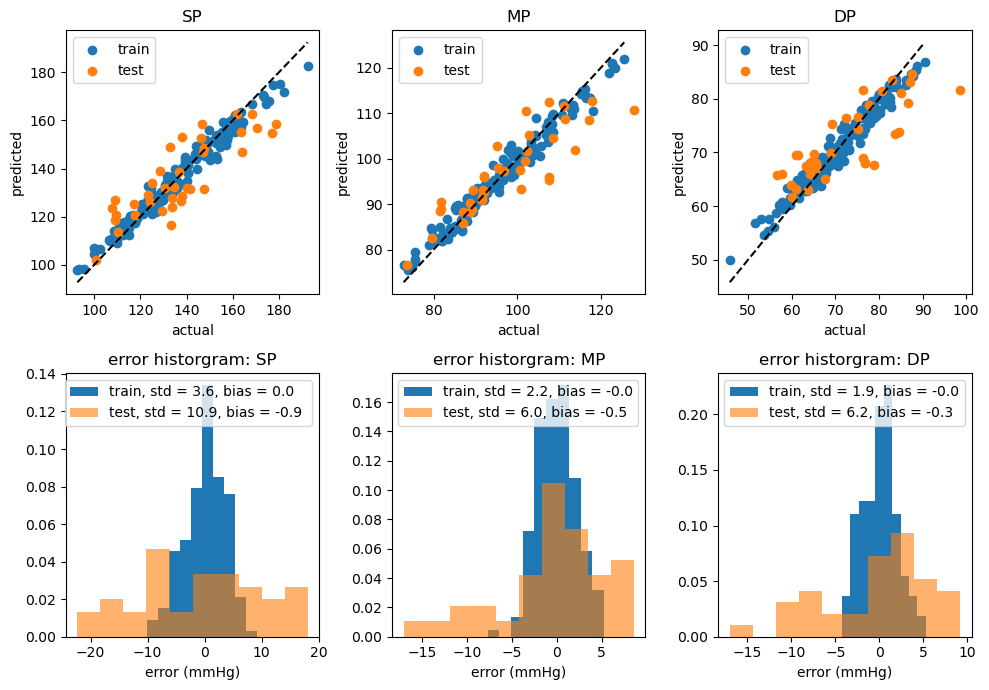

In [44]:
# FIT THE MODEL

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000,n_jobs=-1,verbose =0)
model.fit(x_train, y_train)

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)
plot_everything(y_train, y_test, y_predict_train, y_predict_test)

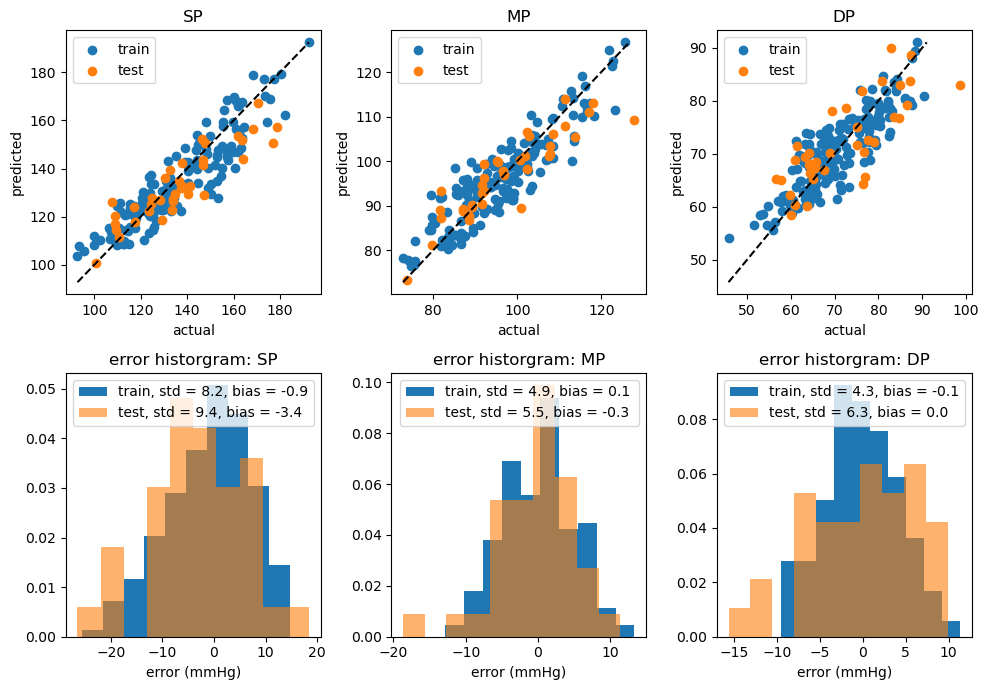

In [36]:
# FIT THE MODEL

from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(2000,1000, 100),learning_rate='adaptive',max_iter=1000)
model.fit(x_train, y_train)

y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

plot_everything(y_train, y_test, y_predict_train, y_predict_test)